In [67]:
import os, sys
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor, BernoulliRBM
from sklearn.externals import joblib
from sklearn.model_selection import cross_val_score

import matplotlib as mp
import matplotlib.pyplot as plt
import pylab as pl

%matplotlib inline

In [68]:
# update fonts
FONTSIZE = 32
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 28}

mp.rc('font', **font)

In [81]:
organic = pd.read_csv('../datasets/descriptor_table.csv')
external =pd.read_csv('../datasets/external_set_chem.csv')
names= organic.keys().tolist()
ext_names=external.keys().tolist()
inputs = names[:-1]
ext_inputs = ext_names[:-1]
print inputs
organic[0:10]

['alcohol_.C1_electrostatic_charge', 'alcohol_.C1_exposed_area', 'alcohol_electronegativity', 'alcohol_primary', 'alcohol_secondary', 'alcohol_tertiary', 'alcohol_cyclic', 'alcohol_4.membered_ring', 'alcohol_5.membered_ring', 'alcohol_6.membered_ring', 'alcohol_7.membered_ring', 'alcohol_benzylic', 'alcohol_allylic', 'alcohol_homobenzylic', 'alcohol_homoallylic', 'alcohol_alpha.carbonyl', 'alcohol_beta_carbonyl', 'alcohol_hemiacetal', 'alcohol_alpha.amino', 'base_.N1_exposed_area', 'sulfonyl_fluoride_.S1_electrostatic_charge', 'sulfonyl_fluoride_.F1_electrostatic_charge', 'sulfonyl_fluoride_.O1_electrostatic_charge']


,alcohol_.C1_electrostatic_charge,alcohol_.C1_exposed_area,alcohol_electronegativity,alcohol_primary,alcohol_secondary,alcohol_tertiary,alcohol_cyclic,alcohol_4.membered_ring,alcohol_5.membered_ring,alcohol_6.membered_ring,...,alcohol_homoallylic,alcohol_alpha.carbonyl,alcohol_beta_carbonyl,alcohol_hemiacetal,alcohol_alpha.amino,base_.N1_exposed_area,sulfonyl_fluoride_.S1_electrostatic_charge,sulfonyl_fluoride_.F1_electrostatic_charge,sulfonyl_fluoride_.O1_electrostatic_charge,yield
0,-0.590356,1.104981,-0.270692,1.133007,-0.999218,-0.257997,-0.723181,-0.179465,-0.429995,-0.429995,...,-0.179465,-0.257997,-0.179465,-0.179465,-0.321382,1.521896,0.674392,-0.768559,-0.967078,42
1,-0.590356,1.104981,-0.270692,1.133007,-0.999218,-0.257997,-0.723181,-0.179465,-0.429995,-0.429995,...,-0.179465,-0.257997,-0.179465,-0.179465,-0.321382,1.521896,-1.844421,-0.090419,0.782873,48
2,-0.590356,1.104981,-0.270692,1.133007,-0.999218,-0.257997,-0.723181,-0.179465,-0.429995,-0.429995,...,-0.179465,-0.257997,-0.179465,-0.179465,-0.321382,1.521896,0.775957,-0.655535,-0.828924,47
3,-0.590356,1.104981,-0.270692,1.133007,-0.999218,-0.257997,-0.723181,-0.179465,-0.429995,-0.429995,...,-0.179465,-0.257997,-0.179465,-0.179465,-0.321382,1.521896,0.674392,-0.429489,-0.552616,52
4,-0.590356,1.104981,-0.270692,1.133007,-0.999218,-0.257997,-0.723181,-0.179465,-0.429995,-0.429995,...,-0.179465,-0.257997,-0.179465,-0.179465,-0.321382,1.521896,-0.280320,1.944002,1.565745,52
5,-0.590356,1.104981,-0.270692,1.133007,-0.999218,-0.257997,-0.723181,-0.179465,-0.429995,-0.429995,...,-0.179465,-0.257997,-0.179465,-0.179465,-0.321382,0.194423,0.674392,-0.768559,-0.967078,76
6,-0.590356,1.104981,-0.270692,1.133007,-0.999218,-0.257997,-0.723181,-0.179465,-0.429995,-0.429995,...,-0.179465,-0.257997,-0.179465,-0.179465,-0.321382,0.194423,-1.844421,-0.090419,0.782873,78
7,-0.590356,1.104981,-0.270692,1.133007,-0.999218,-0.257997,-0.723181,-0.179465,-0.429995,-0.429995,...,-0.179465,-0.257997,-0.179465,-0.179465,-0.321382,0.194423,0.775957,-0.655535,-0.828924,87
8,-0.590356,1.104981,-0.270692,1.133007,-0.999218,-0.257997,-0.723181,-0.179465,-0.429995,-0.429995,...,-0.179465,-0.257997,-0.179465,-0.179465,-0.321382,0.194423,0.674392,-0.429489,-0.552616,82
9,-0.590356,1.104981,-0.270692,1.133007,-0.999218,-0.257997,-0.723181,-0.179465,-0.429995,-0.429995,...,-0.179465,-0.257997,-0.179465,-0.179465,-0.321382,0.194423,-0.280320,1.944002,1.565745,80


In [184]:
test_fraction = 0.20
train_data, test_data = train_test_split(organic, test_size=test_fraction)
print train_data.shape, test_data.shape

(512, 24) (128, 24)


In [185]:
X= organic[inputs]
y= organic['yield']
X.shape, y.shape

((640, 23), (640,))

In [186]:
ext_X = external[ext_inputs]
ext_Y = external['yield']

In [187]:

def standardize_data(train_data, test_data, names):
    scaler  = StandardScaler()
    scaler.fit(train_data[names])
    
    X_train = scaler.transform(train_data[names])
    y_train = train_data['yield']
    
    X_test  = scaler.transform(test_data[names])
    y_test  = test_data['yield']
    return (X_train, X_test, y_train, y_test, scaler)


In [188]:
X_train, X_test, y_train, y_test, scaler = standardize_data(train_data, test_data, inputs)

print(X_train.shape)
X_test.shape


(512, 23)


(128, 23)

In [189]:
XTR= X_train
XTS =X_test
print(XTR.shape)
XTS.shape

(512, 23)


(128, 23)

In [190]:
'''
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(copy=True, iterated_power='auto', n_components=22, random_state=None,
         svd_solver='arpack', tol=0.0, whiten=False)
pca.fit(XTR)
pca.fit(XTS)
XTR = pca.transform(XTR)
XTS = pca.transform(XTS)
print(pca.explained_variance_ratio_)  

print(pca.singular_values_) 

print(XTR.shape)
XTS.shape
'''

"\nimport numpy as np\nfrom sklearn.decomposition import PCA\n\npca = PCA(copy=True, iterated_power='auto', n_components=22, random_state=None,\n         svd_solver='arpack', tol=0.0, whiten=False)\npca.fit(XTR)\npca.fit(XTS)\nXTR = pca.transform(XTR)\nXTS = pca.transform(XTS)\nprint(pca.explained_variance_ratio_)  \n\nprint(pca.singular_values_) \n\nprint(XTR.shape)\nXTS.shape\n"

In [191]:

dnn = MLPRegressor(hidden_layer_sizes=(50,25), 
                    max_iter=600, 
                    alpha=0.2,
                    solver='sgd', 
                    activation='tanh', batch_size='auto', learning_rate='adaptive',
                    verbose=0, 
                    tol=1e-6, 
                    warm_start=True,shuffle=True,validation_fraction=0.2,
                    random_state=1)
# possible combinations of params


param_grid = {'alpha':[0.1,1,10],
              "solver": ["sgd", "adam"], "activation": ['tanh','relu'],
              "max_iter": [520,550,600],
              "hidden_layer_sizes": [(20),(20, 20),(35, 10, 10),(35,15),(35)]}


In [192]:
#rcv = RandomizedSearchCV(dnn,param_grid, n_iter=2, verbose=2)
#rcv= RandomizedSearchCV(dnn, param_grid, n_iter=3, scoring=None, fit_params=None, n_jobs=1, iid=True,
                        #refit=True, cv=None,verbose=1, random_state=None, error_score='raise', return_train_score='warn')
#rcv= GridSearchCV(dnn, param_grid, scoring=None, fit_params=None, n_jobs=1, iid=True, 
                 # refit=True, cv=None, verbose=1, pre_dispatch='2*n_jobs',error_score='raise')
#rcv.fit(X_train, y_train)
#dnn = rcv.best_estimator_
#dnn.fit[X_train, y_train]
#print "Best set of parameters: %s" % rcv.best_params_

In [193]:
''''
dnn = MLPClassifier(hidden_layer_sizes=(10,10), 
              activation='tanh', 
              solver='sgd', alpha=0.0001, batch_size='auto', learning_rate='adaptive', 
              learning_rate_init=0.005, max_iter=200, tol=0.0001, verbose=False, early_stopping=False)
'''

"'\ndnn = MLPClassifier(hidden_layer_sizes=(10,10), \n              activation='tanh', \n              solver='sgd', alpha=0.0001, batch_size='auto', learning_rate='adaptive', \n              learning_rate_init=0.005, max_iter=200, tol=0.0001, verbose=False, early_stopping=False)\n"

In [194]:
print "*** TRAINING ***"
dnn.fit(X_train, y_train)
#scores = cross_val_score(dnn, organic[inputs], organic['yield'], cv=5)
print("Training set score: %f" % dnn.score(X_train, y_train))      
print("Test set score:     %f" % dnn.score(X_test, y_test))
#filename = '02_dnn_organic.pkl'
#print "save to %s" % filename
#joblib.dump(dnn, filename)
#print(scores)

*** TRAINING ***
Training set score: 0.968676
Test set score:     0.898250


In [195]:
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
pr = dnn.predict(X_test)
r2= r2_score(y_test, pr)  
rmse= sqrt ( mean_squared_error(y_test, pr))
print r2
print rmse 

0.8982502544317044
9.3530442588


In [196]:
ext_pr=dnn.predict(ext_X)
r2_ext=r2_score(ext_Y,ext_pr)
rmse_ext=sqrt(mean_squared_error(ext_Y,ext_pr))
print r2_ext
print rmse_ext

-1.0526613338850557
33.3466074704


In [197]:
ext_pr[0:10]

array([37.19811276, 37.64791761, 37.1723734 , 37.18028767, 37.25321223,
       41.57685967, 41.98642395, 41.55564645, 41.56524558, 41.64822442])

In [198]:
'''
print "*** TRAINING ***"
dnn.fit(X_train, y_train)

print("Training set score: %f" % dnn.score(X_train, y_train))      
print("Test set score:     %f" % dnn.score(X_test, y_test))
filename = '02_dnn_organic1.pkl'
print "save to %s" % filename
joblib.dump(dnn, filename)

'''

'\nprint "*** TRAINING ***"\ndnn.fit(X_train, y_train)\n\nprint("Training set score: %f" % dnn.score(X_train, y_train))      \nprint("Test set score:     %f" % dnn.score(X_test, y_test))\nfilename = \'02_dnn_organic1.pkl\'\nprint "save to %s" % filename\njoblib.dump(dnn, filename)\n\n'

In [199]:
from sklearn.metrics import r2_score
p = dnn.predict(X_test)
r2_score(y_test, p)  

0.8982502544317044

In [200]:
def plotLoss(dnn, ftsize=FONTSIZE):
    y    = dnn.loss_curve_
    x    = np.array(range(len(y)))+1

    ymin = 0.8*min(y)
    ymax = 1.2*max(y)
    epoch= range(len(y))
    xmin = 0
    xmax = len(x)
    
    # set size of figure
    plt.figure(figsize=(8,4));

    # get axis info
    axes = plt.gca()
    # set axes' limits
    axes.set_xlim(xmin, xmax)
    axes.set_ylim(ymin, ymax)
    
    # annotate axes
    plt.xlabel(r'epoch', fontsize=ftsize)
    plt.ylabel(r'loss',  fontsize=ftsize)
    
    # choose color of points
    plt.plot(x, y, 'b-')
    plt.savefig('02_dnn_wine_loss.png')
    plt.show()

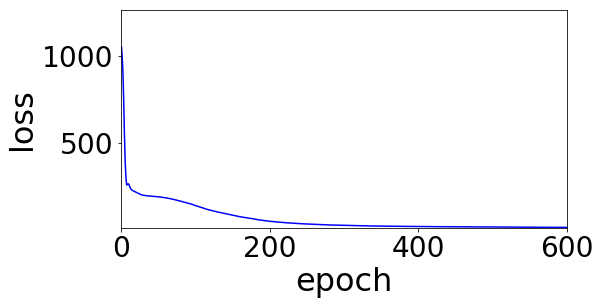

In [201]:
plotLoss(dnn)

In [202]:
'''
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import Ridge

def MSE(y_true,y_pred):
    mse = mean_squared_error(y_true, y_pred)
    print 'MSE: %2.3f' % mse
    return mse

def R2(y_true,y_pred):    
     r2 = r2_score(y_true, y_pred)
     print 'R2: %2.3f' % r2
     return r2

def two_score(y_true,y_pred):    
    MSE(y_true,y_pred) #set score here and not below if using MSE in GridCV
    score = R2(y_true,y_pred)
    return score

def two_scorer():
    return make_scorer(two_score, greater_is_better=True) # change for false if using MSE

model = Ridge()
param_grid = {'alpha':[0.1,1,10]}
#X_train = [[1,2],[1,5],[-3,2],[3,7],[-1,1],[0,-1]]
#y_train = [1,0,1,0,3,5]
grid = GridSearchCV(dnn, param_grid, scoring=two_scorer())

grid.fit(X_train, y_train)
best_params = grid.best_params_
model = grid.best_estimator_
score = grid.best_score_
for item in grid.grid_scores_:
    print "\t%s %s %s" % ('\tGRIDSCORES\t',  "R" , item)
print '%s\tHP\t%s\t%f' % ("R" , str(best_params) ,abs(score))
'''

'\nfrom sklearn.metrics import r2_score, mean_squared_error, make_scorer\nfrom sklearn.grid_search import GridSearchCV\nfrom sklearn.linear_model import Ridge\n\ndef MSE(y_true,y_pred):\n    mse = mean_squared_error(y_true, y_pred)\n    print \'MSE: %2.3f\' % mse\n    return mse\n\ndef R2(y_true,y_pred):    \n     r2 = r2_score(y_true, y_pred)\n     print \'R2: %2.3f\' % r2\n     return r2\n\ndef two_score(y_true,y_pred):    \n    MSE(y_true,y_pred) #set score here and not below if using MSE in GridCV\n    score = R2(y_true,y_pred)\n    return score\n\ndef two_scorer():\n    return make_scorer(two_score, greater_is_better=True) # change for false if using MSE\n\nmodel = Ridge()\nparam_grid = {\'alpha\':[0.1,1,10]}\n#X_train = [[1,2],[1,5],[-3,2],[3,7],[-1,1],[0,-1]]\n#y_train = [1,0,1,0,3,5]\ngrid = GridSearchCV(dnn, param_grid, scoring=two_scorer())\n\ngrid.fit(X_train, y_train)\nbest_params = grid.best_params_\nmodel = grid.best_estimator_\nscore = grid.best_score_\nfor item in grid.

In [203]:
def plotResults(dnn, X_test, y_test, xmin=-2, xmax=100, ymin=-2, ymax=100, ftsize=FONTSIZE):
    
    p = dnn.predict(X_test)
    # set size of figure
    plt.figure(figsize=(10,10));

    # get axis info
    axes = plt.gca()
    # set axes' limits
    axes.set_xlim(xmin, xmax)
    axes.set_ylim(ymin, ymax)
    
    # annotate axes
    plt.xlabel(r'actual', fontsize=ftsize)
    plt.ylabel(r'predicted', fontsize=ftsize)
    
    # choose color of points
    blue= (0,0,1)
    plt.scatter(y_test, p, marker='o', s=50, c=blue, alpha=0.2)    
    plt.savefig('02_dnn_organic_results.png')
    plt.show()
   

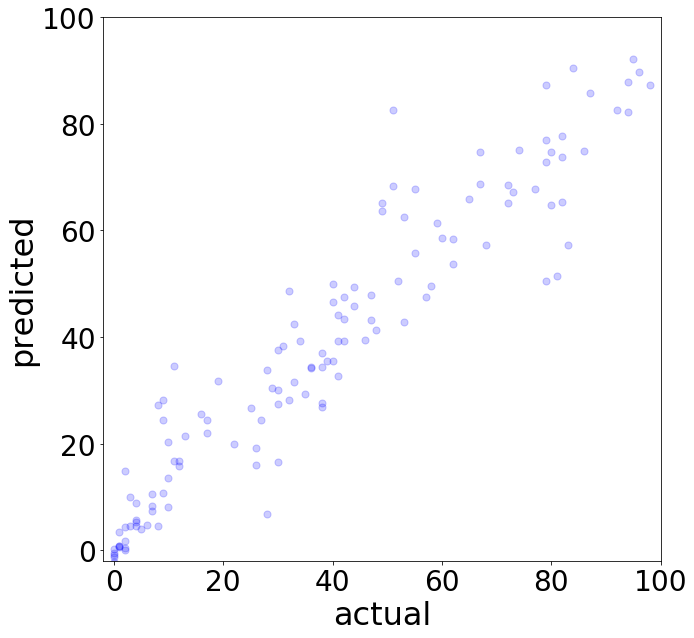

In [204]:
plotResults(dnn, X_test, y_test)

In [205]:
#test= [[0,0,0.65,0,0,0,0,0,0,0,0,0,0.65,0,0,0,0,0,4.6,0,0.65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.97,0.65,0,0,0,0,0,0.125,0,0,1.25,5,40],
       [0,0,0.65,0,0,0,0,0,0,0,0,0,0.65,0,0,0,0,0,4.6,0,0.65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.97,0.65,0,0,0,0,0,0.125,0,0,1.25,5,40]]
#shape=[58]
#predicted= dnn.predict(test)

IndentationError: unexpected indent (<ipython-input-205-0e6ff844615b>, line 2)

In [206]:
from sklearn import svm
clf = svm.SVR(C=29095, cache_size=200, coef0=0.1, degree=3, epsilon=6, gamma='auto',
            kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
clf.fit(X_train, y_train) 
clf.predict(X_test)
print("Training set score: %f" % clf.score(X_train, y_train))      
print("Test set score:     %f" % clf.score(X_test,  y_test))

Training set score: 0.964608
Test set score:     0.876045


In [207]:
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
pr = clf.predict(X_test)
r2= r2_score(y_test, pr)  
rmse= sqrt(mean_squared_error(y_test, pr))
print r2
print rmse

0.8760451845028927
10.323287563


In [208]:
ext_pr_svm=clf.predict(ext_X)
r2_ext_svm=r2_score(ext_Y,ext_pr_svm)
rmse_ext_svm=sqrt(mean_squared_error(ext_Y,ext_pr_svm))
print r2_ext_svm
print rmse_ext_svm
ext_pr_svm[0:10]

-7.113866854944762
66.2989949804


array([34.85946293, 34.86373198, 34.85928607, 34.85946528, 34.86093497,
       35.01767521, 35.02586562, 35.01736712, 35.01773286, 35.02082102])

In [209]:
def plotResults(dnn, X_test, y_test, xmin=-2, xmax=100, ymin=-2, ymax=100, ftsize=FONTSIZE):
    
    p = clf.predict(X_test)
    # set size of figure
    plt.figure(figsize=(10,10));

    # get axis info
    axes = plt.gca()
    # set axes' limits
    axes.set_xlim(xmin, xmax)
    axes.set_ylim(ymin, ymax)
    
    # annotate axes
    plt.xlabel(r'actual', fontsize=ftsize)
    plt.ylabel(r'predicted', fontsize=ftsize)
    
    # choose color of points
    blue= (0,0,1)
    plt.scatter(y_test, p, marker='o', s=50, c=blue, alpha=0.2)    
    plt.savefig('02_clf_organic_results.png')
    plt.show()
   

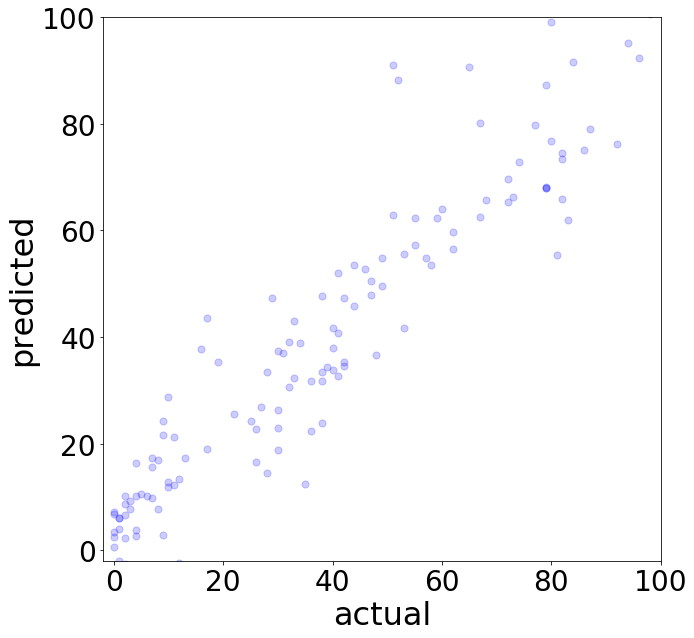

In [210]:
plotResults(clf, X_test, y_test)

In [213]:
from sklearn.ensemble import GradientBoostingRegressor

est = GradientBoostingRegressor(n_estimators=40, learning_rate=0.5,max_depth=5, 
                                random_state=0, loss='ls',criterion= 'mse', warm_start='true')
est.fit(X_train, y_train)
est.predict(X_test)
print("Training set score: %f" % est.score(X_train, y_train))      
print("Test set score:     %f" % est.score(X_test,  y_test))


Training set score: 0.995111
Test set score:     0.932567


In [214]:
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
pr = est.predict(X_test)
r2= r2_score(y_test, pr)  
rmse= sqrt (mean_squared_error(y_test, pr))
print r2
print rmse 

0.9325667525199836
7.61418388653


In [221]:
ext_pr_gb=est.predict(ext_X)
r2_ext_gb=r2_score(ext_Y,ext_pr_gb)
rmse_ext_gb=sqrt(mean_squared_error(ext_Y,ext_pr_gb))
print r2_ext_gb
print rmse_ext_gb
ext_pr_gb[0:100]

-2.3111996976526807
42.3531477684


array([26.31072261, 26.31072261, 26.31072261, 26.31072261, 26.31072261,
       26.31072261, 26.31072261, 26.31072261, 26.31072261, 26.31072261,
       26.31072261, 26.31072261, 26.31072261, 26.31072261, 26.31072261,
       26.31072261, 26.31072261, 26.31072261, 26.31072261, 26.31072261,
       28.17726388, 28.17726388, 28.17726388, 28.17726388, 28.17726388,
       28.17726388, 28.17726388, 28.17726388, 28.17726388, 28.17726388,
       28.17726388, 28.17726388, 28.17726388, 28.17726388, 28.17726388,
       28.17726388, 28.17726388, 28.17726388, 28.17726388, 28.17726388,
       18.73472232, 18.73472232, 18.73472232, 18.73472232, 18.73472232,
       18.73472232, 18.73472232, 18.73472232, 18.73472232, 18.73472232,
       18.73472232, 18.73472232, 18.73472232, 18.73472232, 18.73472232,
       18.73472232, 18.73472232, 18.73472232, 18.73472232, 18.73472232,
       25.095323  , 25.095323  , 25.095323  , 25.095323  , 25.095323  ,
       25.095323  , 25.095323  , 25.095323  , 25.095323  , 25.09

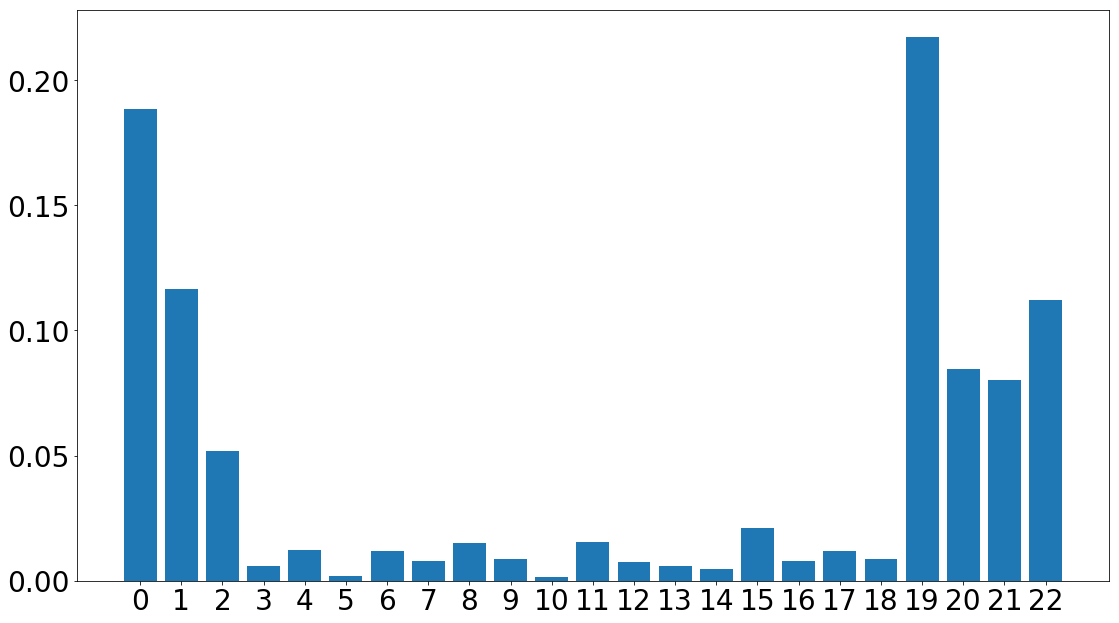

In [216]:
from matplotlib import pyplot, figure
est.feature_importances_
pyplot.bar(range(len(est.feature_importances_)), est.feature_importances_)
fig = pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
pyplot.xticks(np.arange(0, 23, step=1))
pyplot.show()
#imp_features.shape

In [217]:
external = pd.read_csv('../datasets/external_set_chem.csv')
name= external.keys().tolist()
inp = name[:-1]
print (inp)
external[0:10]
X_ext= external[inp]
Y_ext= external['yield']

est.predict(X_ext)

print("Test set score:     %f" % est.score(X_ext,Y_ext))

['alcohol_*C1_electrostatic_charge', 'alcohol_*C1_exposed_area', 'alcohol_electronegativity', 'alcohol_primary', 'alcohol_secondary', 'alcohol_tertiary', 'alcohol_cyclic ', 'alcohol_4-membered_ring', 'alcohol_5-membered_ring', 'alcohol_6-membered_ring', 'alcohol_7-membered_ring', 'alcohol_benzylic', 'alcohol_allylic', 'alcohol_homobenzylic', 'alcohol_homoallylic', 'alcohol_alpha-carbonyl', 'alcohol_beta_carbonyl', 'alcohol_hemiacetal', 'alcohol_alpha amino', 'base_*N1_exposed_area', 'sulfonyl_fluoride_*S1_electrostatic_charge', 'sulfonyl_fluoride_*F1_electrostatic_charge', 'sulfonyl_fluoride_*O1_electrostatic_charge']
Test set score:     -2.311200


In [218]:
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
pr1 = est.predict(X_ext)
r2= r2_score(Y_ext, pr1)  
rmse= sqrt (mean_squared_error(Y_ext, pr1))
print r2
print rmse

-2.3111996976526807
42.3531477684


In [219]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

rng = np.random.RandomState(1)

regr_1 = DecisionTreeRegressor(max_depth=10)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=100, learning_rate=3, loss='exponential', random_state=rng)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

# Predict
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

print("Training set score: %f" % regr_2.score(X_train, y_train))      
print("Test set score:     %f" % regr_2.score(X_test,  y_test))

Training set score: 0.815343
Test set score:     0.770933


In [220]:
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
pr_2 = regr_2.predict(X_test)
r2= r2_score(y_test, pr_2)  
rmse= sqrt (mean_squared_error(y_test, pr_2))
print r2
print rmse 

0.7709327987538227
14.0335574958
